# Exercises

continuous_probabilistic_methods.py or continuous_probabilistic_methods.ipynb 1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

1. Using lemonade.csv dataset and focusing on continuous variables:

 - Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of  lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?
 - Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?
 - Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?
 - Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?


2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

 - Use a 2 sigma decision rule to isolate the outliers.
 - Do these make sense?
 - Should certain outliers be kept or removed?


3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df = pd.read_csv('lemonade.csv')

In [102]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.589041
std,18.085892,0.273890,13.786445,0.0,29.979680
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [103]:
df.shape

(365, 7)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
Date           365 non-null object
Day            365 non-null object
Temperature    365 non-null float64
Rainfall       365 non-null float64
Flyers         365 non-null int64
Price          365 non-null float64
Sales          365 non-null int64
dtypes: float64(3), int64(2), object(2)
memory usage: 20.0+ KB


In [105]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [106]:
df.mean()

Temperature    61.224658
Rainfall        0.825973
Flyers         40.104110
Price           0.500000
Sales          27.589041
dtype: float64

In [107]:
df_continuous = df[['Temperature', 'Rainfall', 'Flyers', 'Sales']]

In [108]:
df_continuous.std()

Temperature    18.085892
Rainfall        0.273890
Flyers         13.786445
Sales          29.979680
dtype: float64

In [109]:
zscores = df_continuous.subtract(df_continuous.mean())/df_continuous.std()

In [110]:
zscores.head()

,Temperature,Rainfall,Flyers,Sales
0,-1.892340,4.286488,-1.820927,-0.586699
1,-1.787286,1.840253,-1.820927,-0.486631
2,-1.477652,1.840253,-0.950507,-0.419919
3,-0.946852,0.817946,-0.877972,-0.353207
4,-1.040848,0.635391,-0.515297,-0.319851


In [111]:
zscores.Temperature[zscores.Temperature.abs() > 1.5]

0     -1.892340
1     -1.787286
5     -1.986336
6     -1.566119
10    -1.582706
15    -1.693290
16    -1.604823
19    -1.637998
23    -1.803873
24    -1.604823
41     8.336627
154    1.613155
158    1.629742
162    1.756913
166    2.105251
171    1.828792
176    2.287714
180    1.557863
181    2.304301
182    1.779030
185    1.756913
186    1.685034
190    2.033372
194    1.701621
198    2.105251
202    2.121838
203    1.541275
207    2.027843
336   -1.532944
338   -2.168799
342   -1.660115
343   -1.654586
345   -1.532944
346   -1.604823
347   -1.621411
350   -1.604823
351   -1.676702
355   -1.676702
359   -1.787286
363   -1.676702
364   -2.550311
Name: Temperature, dtype: float64

In [112]:
zscores.Temperature[zscores.Temperature.abs() > 3]

41    8.336627
Name: Temperature, dtype: float64

2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:
 - Use a 2 sigma decision rule to isolate the outliers.
 - Do these make sense?
 - Should certain outliers be kept or removed?

Text(0.5, 1.0, 'Temperature over Time')

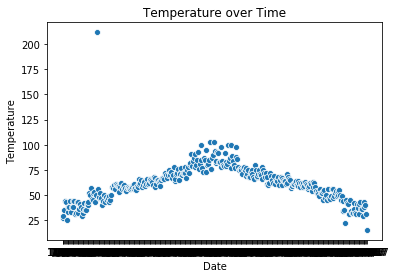

In [115]:
sns.scatterplot(x=df.Date, y=df.Temperature).set_title('Temperature over Time')

Text(0.5, 1.0, 'Temperature over Time')

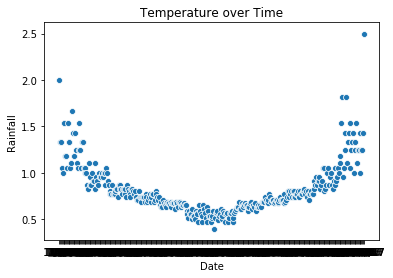

In [117]:
sns.scatterplot(x=df.Date, y=df.Rainfall).set_title('Temperature over Time')

Text(0.5, 1.0, 'Temperature over Time')

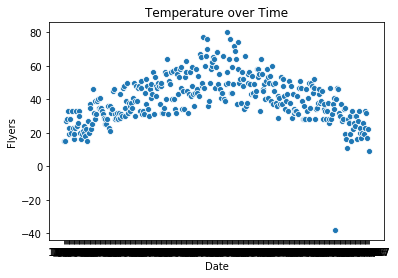

In [118]:
sns.scatterplot(x=df.Date, y=df.Flyers).set_title('Temperature over Time')

Text(0.5, 1.0, 'Temperature over Time')

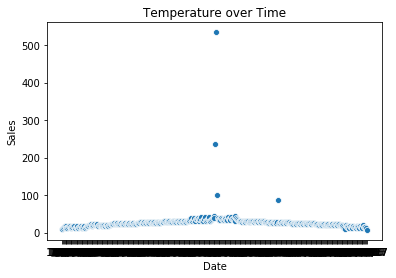

In [119]:
sns.scatterplot(x=df.Date, y=df.Sales).set_title('Temperature over Time')

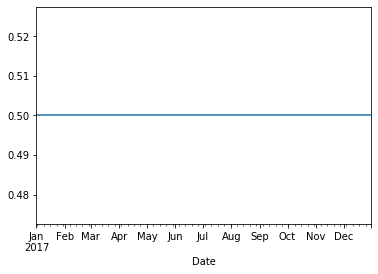

In [76]:
df.Price.plot()

## Below:  3 different ways to do subplots

In [ ]:
df.Date = pd.to_datetime(df.Date)
df = df.set_index('Date')

In [ ]:
sns.scatterplot(x=df.Date, y=df.Temperature).set_title('Temperature over Time')

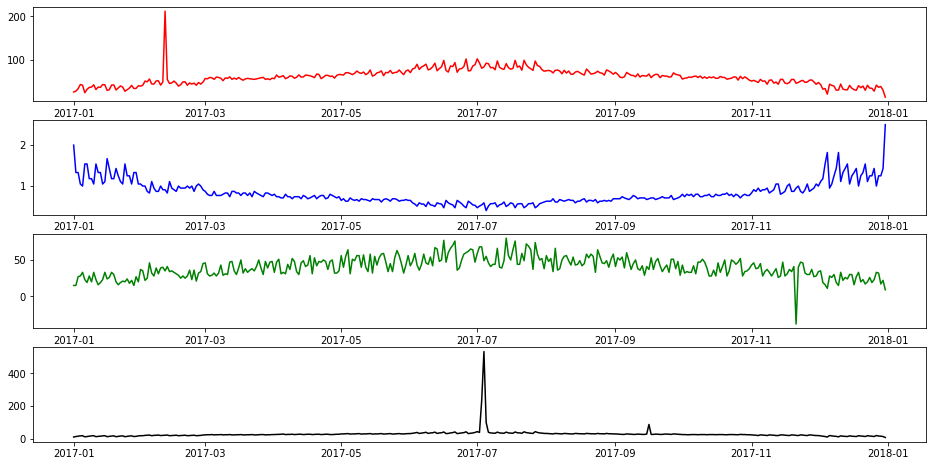

In [97]:
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(nrows=4, ncols=1, figsize=(16,8))
ax1.plot(df.Temperature, 'r')
ax2.plot(df.Rainfall, 'b')
ax3.plot(df.Flyers, 'g')
ax4.plot(df.Sales, 'k')

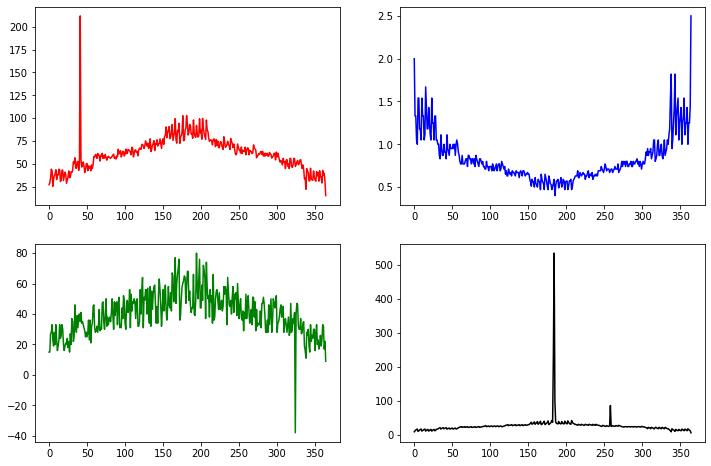

In [123]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
ax1.plot(df.Temperature, 'r')
ax2.plot(df.Rainfall, 'b')
ax3.plot(df.Flyers, 'g')
ax4.plot(df.Sales, 'k')

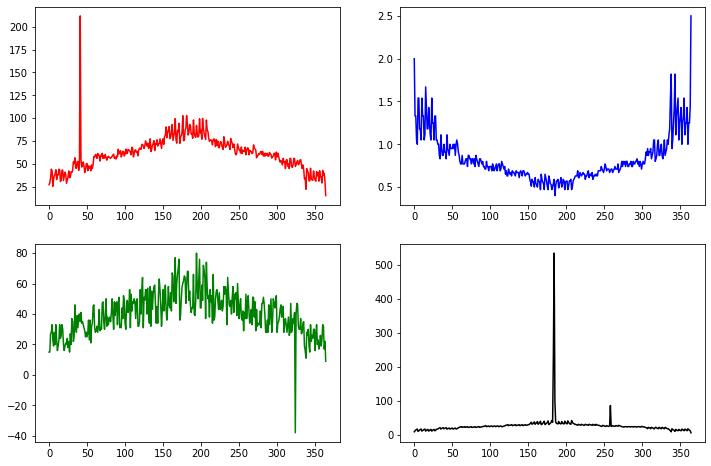

In [121]:
fig = plt.figure(figsize=(12,8))

plt.subplot(2, 2, 1)
plt.plot(df.index, df.Temperature, 'r')

plt.subplot(2, 2, 2)
plt.plot(df.index, df.Rainfall, 'b')

plt.subplot(2, 2, 3)
plt.plot(df.index, df.Flyers, 'g')

plt.subplot(2, 2, 4)
plt.plot(df.index, df.Sales, 'k')

plt.show()

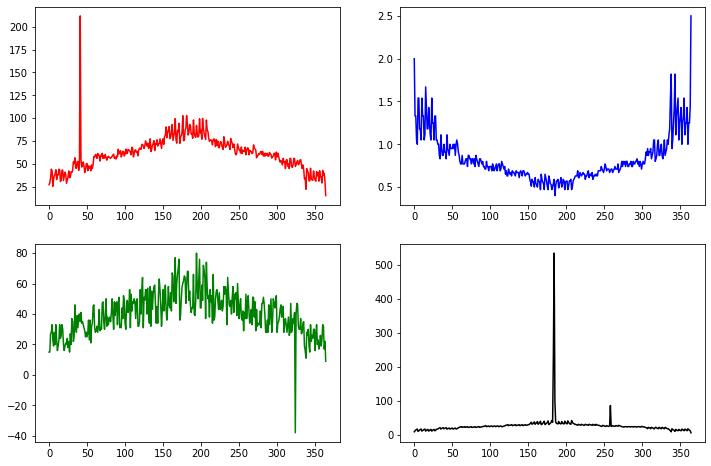

In [128]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
ax1.plot(df.Temperature, 'r')
ax2.plot(df.Rainfall, 'b')
ax3.plot(df.Flyers, 'g')
ax4.plot(df.Sales, 'k')

### Histograms to see if it is normally distributed

Remove temperature outlier of 212

In [131]:
df.loc[df.Temperature == 212, 'Temperature'] = 50

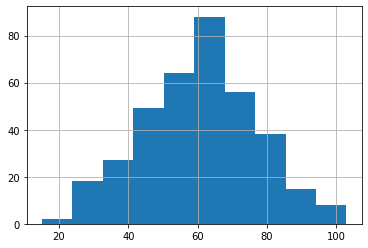

In [132]:
df.Temperature.hist()

In [133]:
sigma = df.Temperature.std()

In [134]:
mean_minus_two_sigma = df.Temperature.mean() - 2*sigma
mean_plus_two_sigma = df.Temperature.mean() + 2*sigma

In [135]:
df[df.Temperature < mean_minus_two_sigma]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
5,1/6/17,Friday,25.3,1.54,23,0.5,11
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [136]:
df[df.Temperature > mean_plus_two_sigma]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
171,6/21/17,Wednesday,94.3,0.47,76,0.5,41
176,6/26/17,Monday,102.6,0.47,60,0.5,42
181,7/1/17,Saturday,102.9,0.47,59,0.5,43
182,7/2/17,Sunday,93.4,0.51,68,0.5,38
190,7/10/17,Monday,98.0,0.49,66,0.5,40
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41
202,7/22/17,Saturday,99.6,0.47,49,0.5,42
207,7/27/17,Thursday,97.9,0.47,74,0.5,43


Only 3.5 percent are outliers.  Less than 5 percent so its okay to use.

In [139]:
13/365 * 100

3.5616438356164384

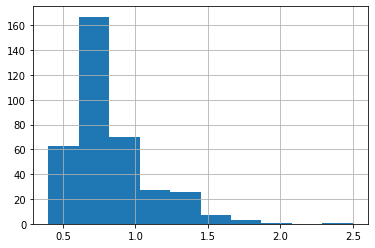

In [125]:
df.Rainfall.hist()

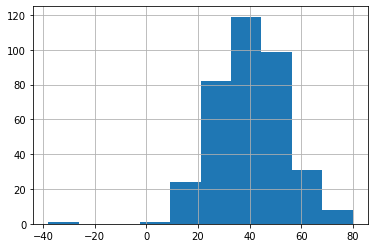

In [129]:
df.Flyers.hist()

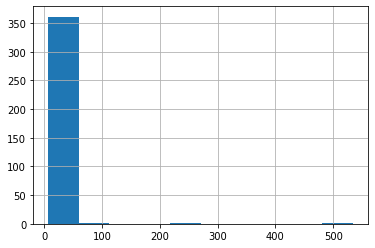

In [130]:
df.Sales.hist()